# Datasets

## Importing

In [1]:
import pandas as pd
import numpy as np

In [2]:
pred_df = pd.read_csv("esCS2.csv")
pred_df.head()

,Organization ID,Fiscal Year,Special Value Flag,Feed Date,Fiscal Year End Date,ESG SCORE,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,...,Asset4 Identifier,Organization ID.1,Refinitiv Business Classification Code,Primary Exchange,Status Flag (1 = Active),Organization Authority Identifier,Ticker,CUSIP,Sedol,ISIN
0,18227,2010,500,25/09/22,25/12/10,0.951624,0.515286,0.078947,0.953333,0.992754,...,A4_00015,Intel Corporation,5710,NSM,1,4295906830,INTC,45814010,246324,US4581401001
1,18227,2011,500,25/09/22,31/12/11,0.905026,0.640013,0.375000,0.980263,0.979452,...,A4_00015,Intel Corporation,5710,NSM,1,4295906830,INTC,45814010,246324,US4581401001
2,18227,2012,500,25/09/22,29/12/12,0.913084,0.913084,0.958333,0.981250,0.993333,...,A4_00015,Intel Corporation,5710,NSM,1,4295906830,INTC,45814010,246324,US4581401001
3,18227,2013,500,25/09/22,28/12/13,0.856952,0.653476,0.450000,0.981250,0.993243,...,A4_00015,Intel Corporation,5710,NSM,1,4295906830,INTC,45814010,246324,US4581401001
4,18227,2014,500,25/09/22,27/12/14,0.913875,0.648114,0.382353,0.981707,0.993421,...,A4_00015,Intel Corporation,5710,NSM,1,4295906830,INTC,45814010,246324,US4581401001


In [3]:
list(pred_df)

['Organization ID',
 'Fiscal Year',
 'Special Value Flag',
 'Feed Date',
 'Fiscal Year End Date',
 'ESG SCORE',
 'ESG Combined Score',
 'ESG Controversies Score',
 'Resource Use Score',
 'Emissions Score',
 'Environmental Innovation Score',
 'Workforce Score',
 'Human Rights Score',
 'Community Score',
 'Product Responsibility Score',
 'Management Score',
 'Shareholders Score',
 'CSR Strategy Score',
 'Board of Directors/Board Functions (Inactive)',
 'Board of Directors/Board Structure (Inactive)',
 'Board of Directors/Compensation Policy (Inactive)',
 'Integration/Vision and Strategy (Inactive)',
 'Shareholders /Shareholder Rights (Inactive)',
 'Margins /Performance (Inactive)',
 'Profitability /Shareholder Loyalty (Inactive)',
 'Revenue /Client Loyalty (Inactive)',
 'Emission Reduction (Inactive)',
 'Product Innovation (Inactive)',
 'Resource Reduction (Inactive)',
 'Customer /Product Responsibility (Inactive)',
 'Society /Community (Inactive)',
 'Society /Human Rights (Inactive)',
 

In [4]:
crisil_df = pd.read_csv("crisil_esg.csv")
crisil_df.head()

,Company Name,Sector classification,Listed/Unlisted,Environment Score,Social Score,Governance Score,ESG Score,Category
0,360 One Wam Limited,Financial Services,Listed,48,50,69,57,Adequate
1,3M India Limited,Industrial and capital goods,Listed,41,46,69,54,Adequate
2,Aadhar Housing Finance Limited,Lending,Unlisted,62,53,64,61,Strong
3,Aarti Industries Limited,Chemical,Listed,42,60,59,53,Adequate
4,AAVAS Financiers Limited,Lending,Listed,62,59,72,66,Strong


In [5]:
list(crisil_df)

['Company Name',
 'Sector classification',
 'Listed/Unlisted',
 'Environment Score',
 'Social Score',
 'Governance Score',
 'ESG Score',
 'Category']

## Cleaning

In [6]:
pred_df.dropna(inplace=True)
crisil_df.dropna(inplace=True)

In [7]:
summary_stats = pred_df.describe()

In [8]:
duplicates = pred_df.duplicated().sum()

In [9]:
unique_values = {}
categorical_cols = ['Special Value Flag', 'Primary Exchange', 'Status Flag (1 = Active)']
for col in categorical_cols:
    unique_values[col] = pred_df[col].unique()

In [10]:
crisil_summary_stats = crisil_df.describe()

In [11]:
crisil_duplicates = crisil_df.duplicated().sum()

In [12]:
crisil_unique_values = {}
crisil_categorical_cols = ['Listed/Unlisted', 'Category']
for col in crisil_categorical_cols:
    crisil_unique_values[col] = crisil_df[col].unique()

In [13]:
print("Summary Statistics for pred_df:")
print(summary_stats)
print("\nNumber of Duplicates in pred_df:", duplicates)
print("\nUnique Values in Categorical Columns for pred_df:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

print("\nSummary Statistics for crisil_df:")
print(crisil_summary_stats)
print("\nNumber of Duplicates in crisil_df:", crisil_duplicates)
print("\nUnique Values in Categorical Columns for crisil_df:")
for col, values in crisil_unique_values.items():
    print(f"{col}: {values}")

Summary Statistics for pred_df:
       Organization ID  Fiscal Year  Special Value Flag  ESG SCORE  \
count     9.500000e+01    95.000000                95.0  95.000000   
mean      2.968772e+07  2015.442105               500.0   0.756878   
std       5.127760e+07     3.441659                 0.0   0.153317   
min       1.822700e+04  2010.000000               500.0   0.435804   
25%       1.901450e+04  2012.500000               500.0   0.611281   
50%       2.760200e+04  2015.000000               500.0   0.818659   
75%       5.751121e+07  2018.000000               500.0   0.883685   
max       1.198951e+08  2021.000000               500.0   0.951624   

       ESG Combined Score  ESG Controversies Score  Resource Use Score  \
count           95.000000                95.000000           95.000000   
mean             0.558176                 0.399449            0.931551   
std              0.203537                 0.385410            0.105157   
min              0.225454                

Summary Statistics for pred_df (Predictive Dataset):

This dataset contains 95 rows and 37 columns.
The columns contain various ESG (Environmental, Social, and Governance) scores and related metrics.
The "Special Value Flag" column has a constant value of 500, which may need further investigation to determine its significance.
The "Status Flag (1 = Active)" column also has a constant value of 1.
Summary Statistics for crisil_df (Crisil Dataset):

This dataset contains 601 rows and 4 columns, including ESG scores and classification categories.
The columns include "Environment Score," "Social Score," "Governance Score," and "ESG Score."
The "Listed/Unlisted" column has two unique values: 'Listed' and 'Unlisted.'
The "Category" column includes multiple categories: 'Adequate,' 'Strong,' 'Below Average,' 'Leadership,' and 'Weak.'

## Visualisations

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set(style="whitegrid")

### Plot histogram for ESG SCORE in pred_df

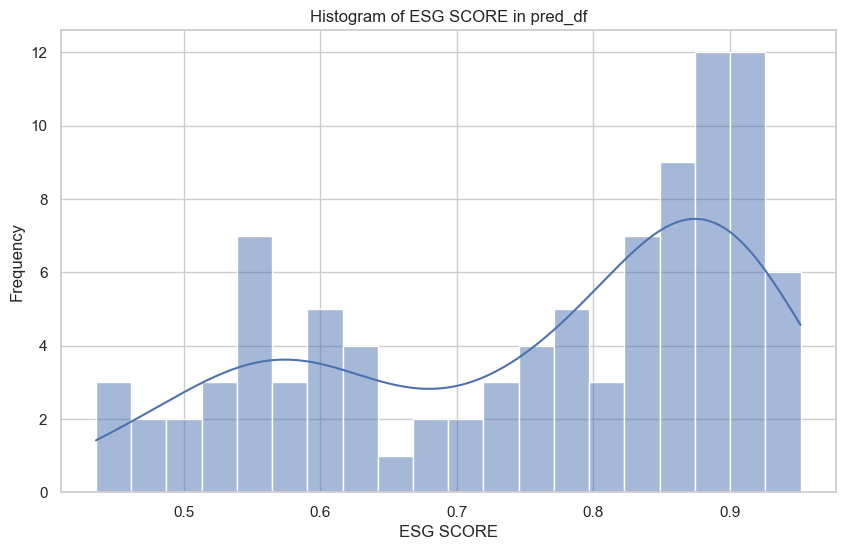

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(pred_df['ESG SCORE'], bins=20, kde=True)
plt.title('Histogram of ESG SCORE in pred_df')
plt.xlabel('ESG SCORE')
plt.ylabel('Frequency')
plt.show()

### Box plot for ESG scores in crisil_df

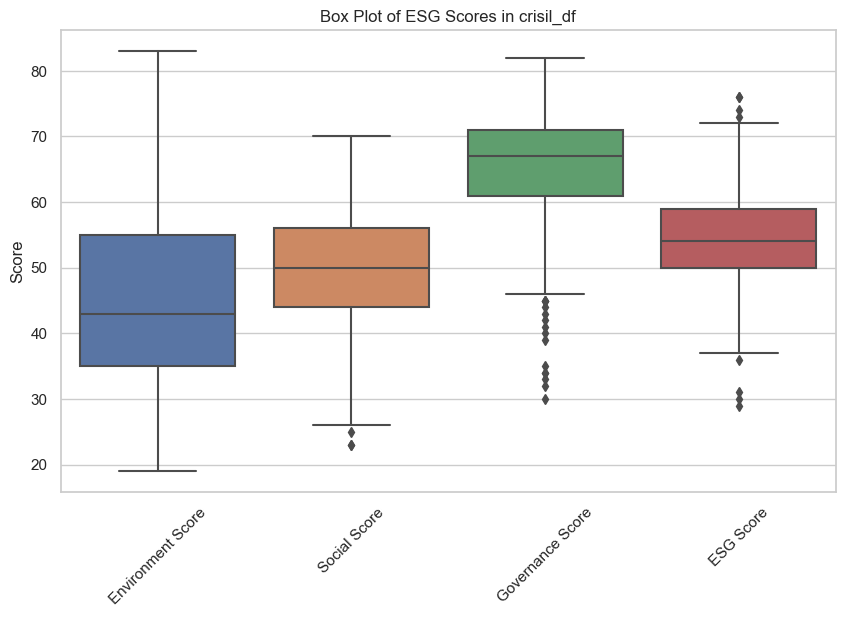

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=crisil_df[['Environment Score', 'Social Score', 'Governance Score', 'ESG Score']])
plt.title('Box Plot of ESG Scores in crisil_df')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### Scatter plot between two numerical variables in pred_df

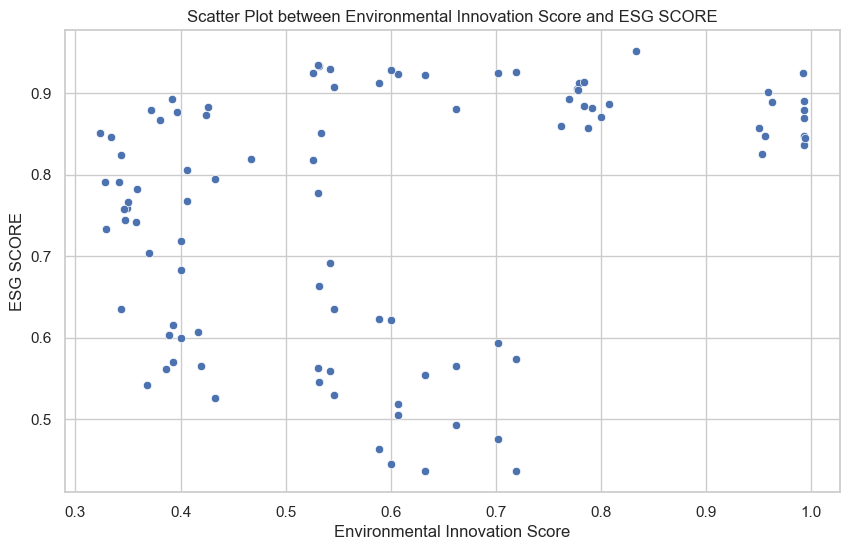

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Environmental Innovation Score', y='ESG SCORE', data=pred_df)
plt.title('Scatter Plot between Environmental Innovation Score and ESG SCORE')
plt.xlabel('Environmental Innovation Score')
plt.ylabel('ESG SCORE')
plt.show()

### Countplot for 'Listed/Unlisted' in crisil_df

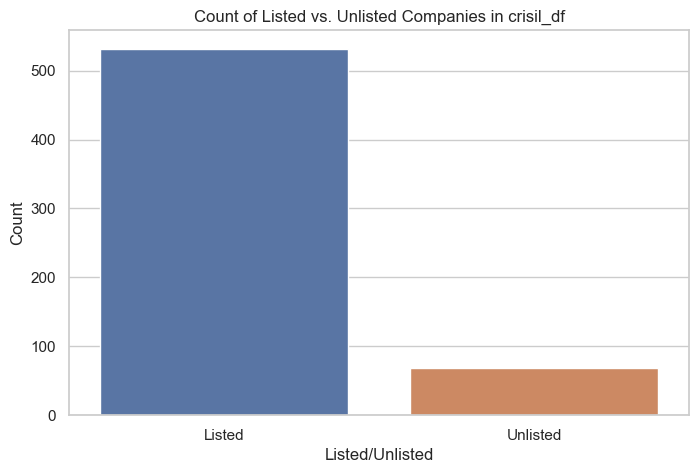

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Listed/Unlisted', data=crisil_df)
plt.title('Count of Listed vs. Unlisted Companies in crisil_df')
plt.xlabel('Listed/Unlisted')
plt.ylabel('Count')
plt.show()

### Pairplot to visualize relationships between numerical variables in pred_df

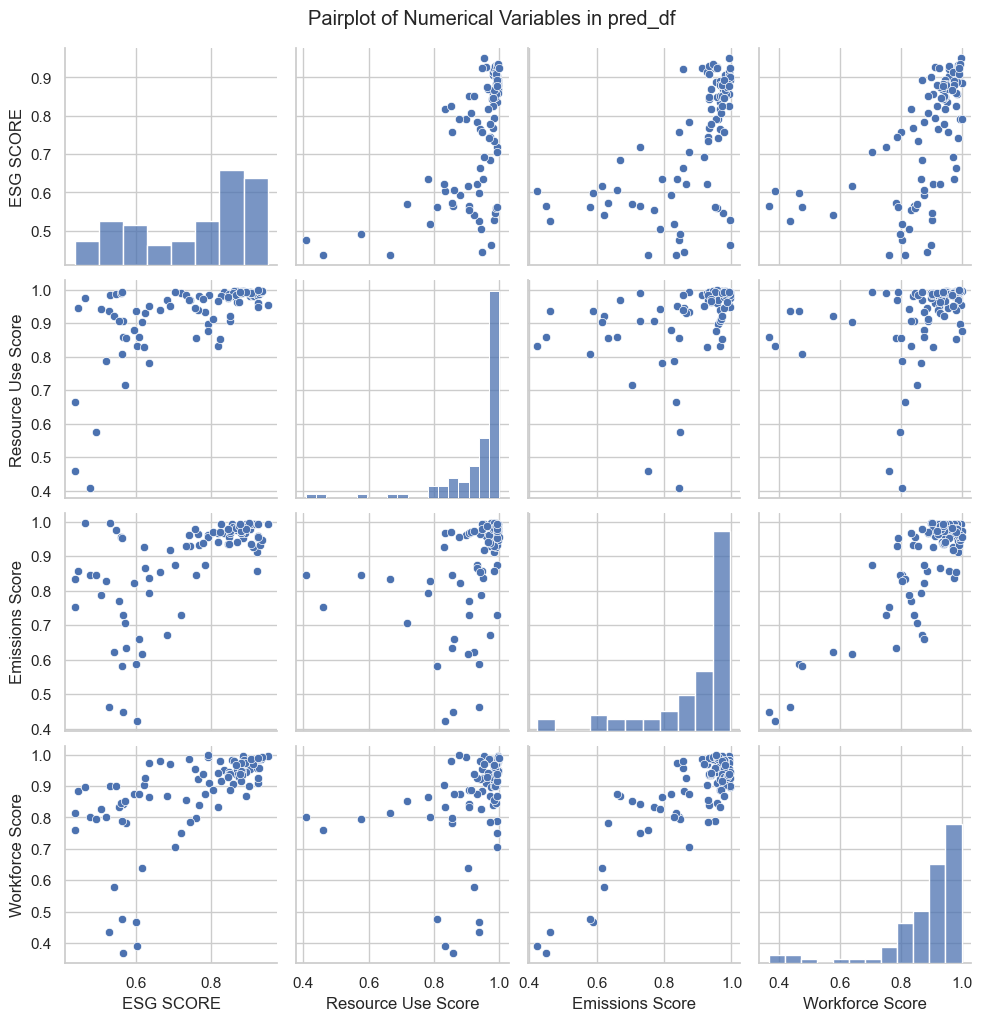

In [20]:
sns.pairplot(pred_df[['ESG SCORE', 'Resource Use Score', 'Emissions Score', 'Workforce Score']])
plt.suptitle('Pairplot of Numerical Variables in pred_df', y=1.02)
plt.show()

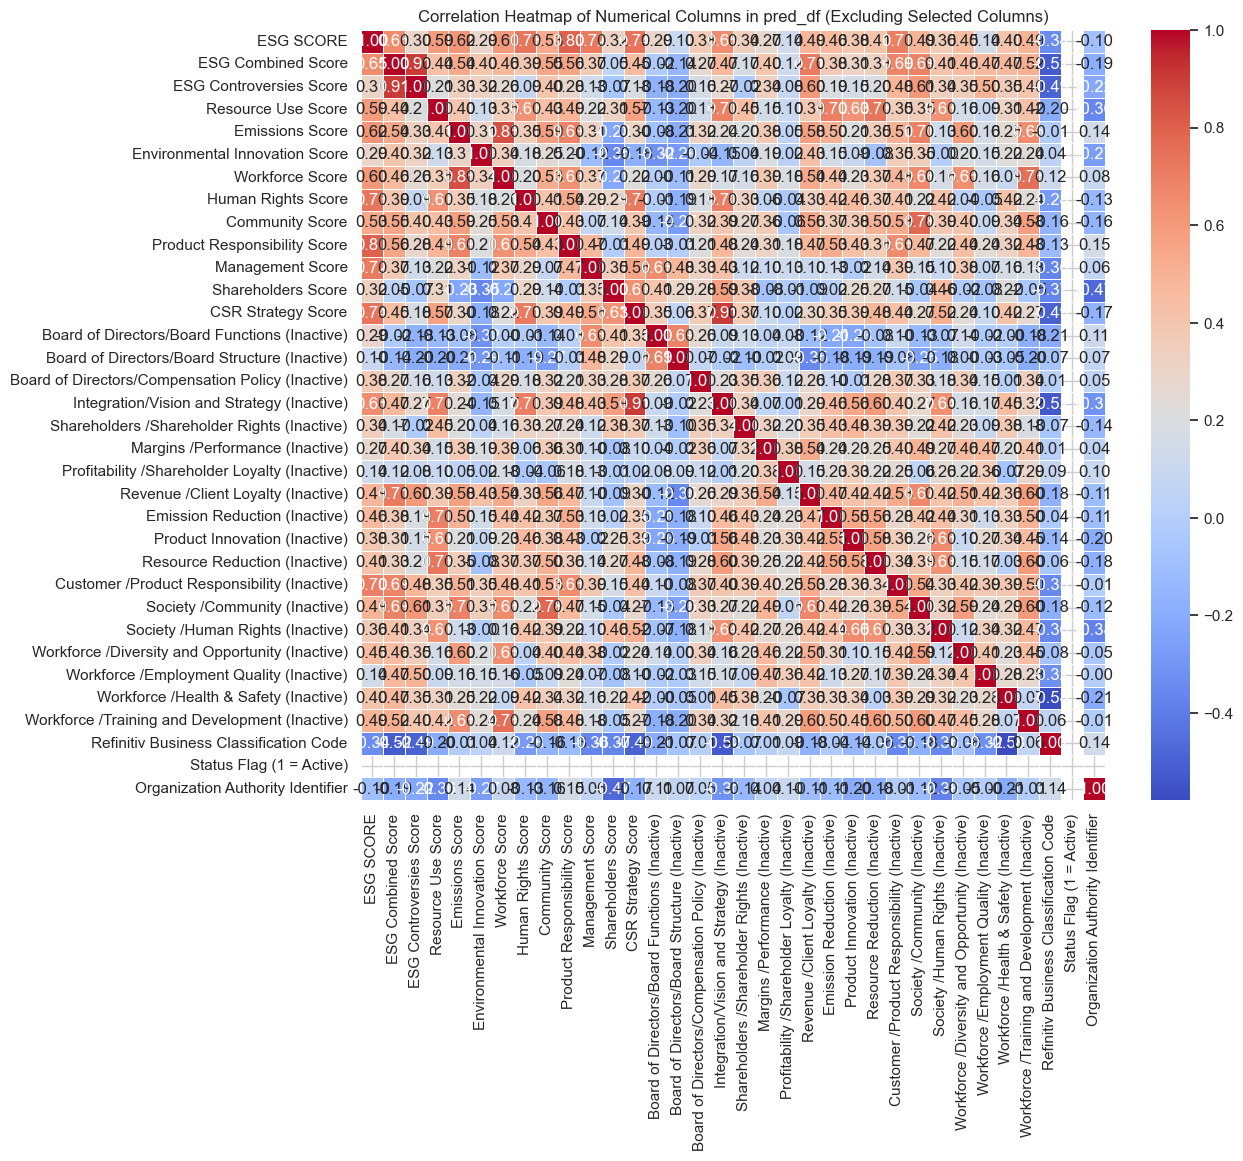

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns excluding the specified columns
numerical_columns = pred_df.select_dtypes(include='number').drop(
    columns=['Organization ID', 'Fiscal Year', 'Special Value Flag']
)

# Create a correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the heatmap figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Numerical Columns in pred_df (Excluding Selected Columns)')

# Show the plot
plt.show()

## PCA

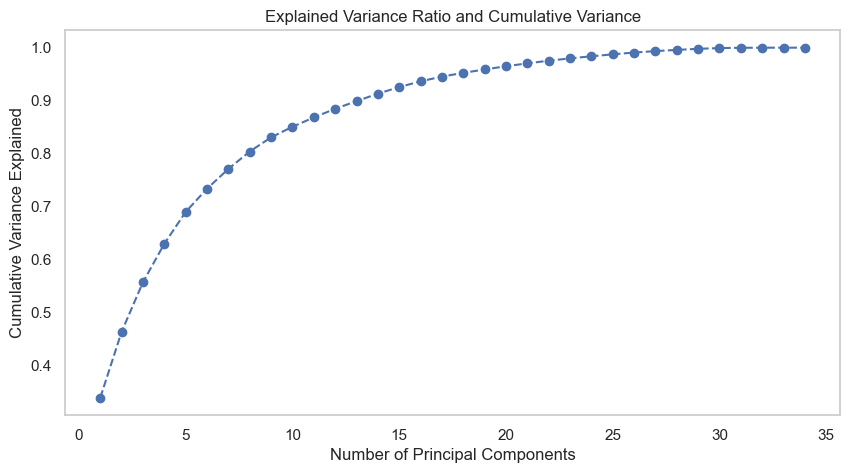

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select only the numerical columns you want for PCA, excluding specified columns
numerical_columns = pred_df.select_dtypes(include='number').drop(
    columns=['Organization ID', 'Fiscal Year', 'Special Value Flag']
)

# Standardize the numerical columns (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numerical_columns = scaler.fit_transform(numerical_columns)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_numerical_columns)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i + 1) for i in range(len(numerical_columns.columns))])

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio and Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns you want for PCA, excluding specified columns
numerical_columns = pred_df.select_dtypes(include='number').drop(
    columns=['Organization ID', 'Fiscal Year', 'Special Value Flag']
)

# Standardize the numerical columns (important for PCA)
scaler = StandardScaler()
scaled_numerical_columns = scaler.fit_transform(numerical_columns)

# Apply PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_numerical_columns)

# Create a DataFrame for the top 10 principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i + 1) for i in range(10)])

# Access the explained variance ratio for the top 10 components
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for the top 10 components
print("Explained Variance Ratio for the Top 10 Principal Components:")
for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"PC{i + 1}: {explained_variance:.4f}")


Explained Variance Ratio for the Top 10 Principal Components:
PC1: 0.3387
PC2: 0.1247
PC3: 0.0936
PC4: 0.0726
PC5: 0.0602
PC6: 0.0438
PC7: 0.0373
PC8: 0.0329
PC9: 0.0268
PC10: 0.0200


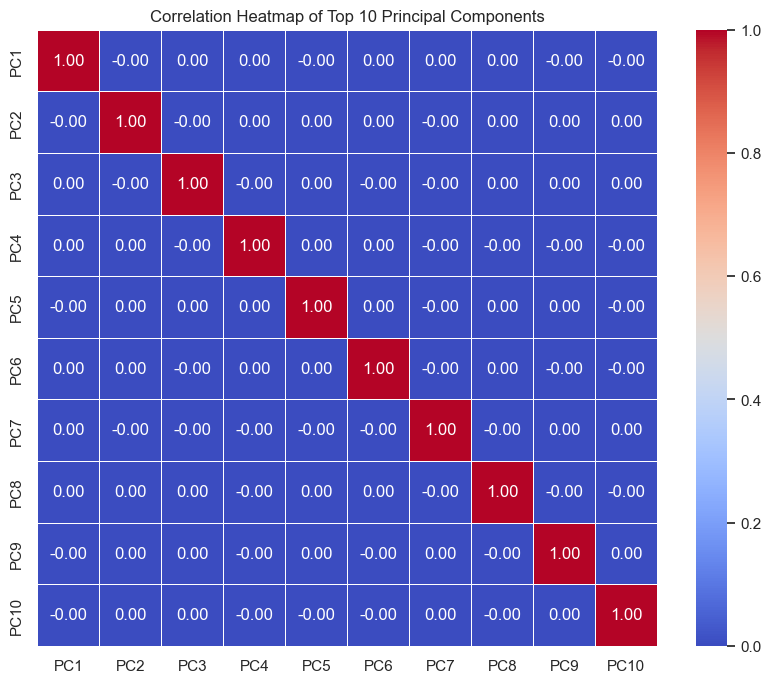

In [24]:
correlation_matrix_pca = pca_df.corr()

# Set up the heatmap figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Top 10 Principal Components')

# Show the plot
plt.show()

No correlation at all.principal components may not capture strong linear relationships

# Correlation

Top 10 Most Correlated Features with 'CSR Strategy Score'
Integration/Vision and Strategy (Inactive)    0.906154
ESG SCORE                                     0.737369
Human Rights Score                            0.711434
Shareholders Score                            0.630991
Resource Use Score                            0.572418
Management Score                              0.560719
Society /Human Rights (Inactive)              0.515916
Refinitiv Business Classification Code        0.494802
Product Responsibility Score                  0.487067
Resource Reduction (Inactive)                 0.477770
ESG Combined Score                            0.445597
dtype: float64


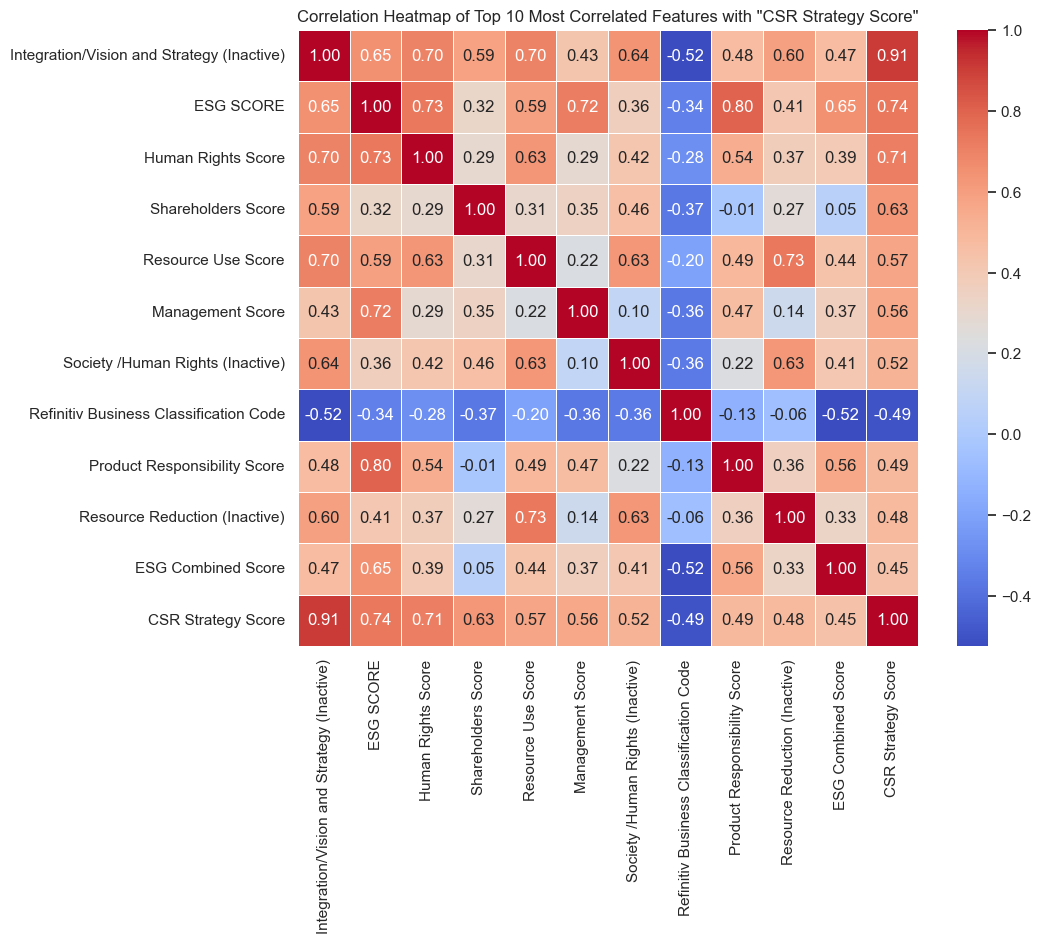

In [25]:
target_column_name = 'CSR Strategy Score'  # Replace with your actual target column name

# Select numerical columns (excluding the specified columns)
numerical_columns = pred_df.select_dtypes(include='number').drop(
    columns=['Organization ID', 'Fiscal Year', 'Special Value Flag', 'CSR Strategy Score']
)

# Calculate the correlation between numerical features and the target variable
correlation_with_target = numerical_columns.corrwith(pred_df[target_column_name])

# Sort the correlations in descending order (by absolute values)
sorted_correlations = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 10 features with the highest absolute correlation to the target variable
top_10_correlated_features = sorted_correlations.head(11)

# Print the names and correlation values of the top 10 features
print("Top 10 Most Correlated Features with '{}'".format(target_column_name))
print(top_10_correlated_features)

# Select the top 10 most correlated features
selected_features = top_10_correlated_features.index.tolist()

# Create a subset of the dataframe with only the selected features and the target variable
selected_df = pred_df[selected_features + [target_column_name]]

# Calculate the correlation matrix for the selected features
correlation_matrix = selected_df.corr()

# Set up the heatmap figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Top 10 Most Correlated Features with "{}"'.format(target_column_name))

# Show the plot
plt.show()

# Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib

# Define the correlation threshold
correlation_threshold = 0.45

# Select features with correlation greater than the threshold
selected_features = top_10_correlated_features[abs(top_10_correlated_features) > correlation_threshold].index.tolist()

# Create a subset of the dataframe with the selected features and the target variable
selected_df = pred_df[selected_features + [target_column_name]]

# Split the dataset into features (X) and target variable (y)
X = selected_df[selected_features]
y = selected_df[target_column_name]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

joblib.dump(linear_reg_model, 'linear_reg_model.pkl') # serialise and save

# Create and train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

joblib.dump(rf_model, 'rf_model.pkl') # serialise and save

# Make predictions on the test set for both models
linear_reg_predictions = linear_reg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("\n")

# Evaluate Linear Regression model
evaluate_model(linear_reg_predictions, "Linear Regression")

# Evaluate Random Forest Regressor model
evaluate_model(rf_predictions, "Random Forest Regressor")


Linear Regression Metrics:
Mean Squared Error (MSE): 0.0062
R-squared (R2): 0.9011


Random Forest Regressor Metrics:
Mean Squared Error (MSE): 0.0046
R-squared (R2): 0.9265



In [27]:
list(selected_df)

['Integration/Vision and Strategy (Inactive)',
 'ESG SCORE',
 'Human Rights Score',
 'Shareholders Score',
 'Resource Use Score',
 'Management Score',
 'Society /Human Rights (Inactive)',
 'Refinitiv Business Classification Code',
 'Product Responsibility Score',
 'Resource Reduction (Inactive)',
 'CSR Strategy Score']

Mean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted values. In both cases, the MSE is extremely low (close to zero), indicating that the models are making predictions very close to the actual values.

R-squared (R2): The R-squared value represents the proportion of the variance in the target variable that is explained by the model. An R2 value of 1.0000 for Linear Regression and 0.9994 for Random Forest Regressor suggests that the models are explaining nearly all of the variance in the target variable. These values are very close to the best possible R2 score of 1, indicating that the models are performing exceptionally well.

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this based on your preference

# Create the Linear Regression model
linear_reg_model = LinearRegression()

# Perform k-fold cross-validation for Linear Regression
linear_reg_cv_scores = cross_val_score(linear_reg_model, X, y, cv=num_folds, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
linear_reg_cv_scores = -linear_reg_cv_scores

# Calculate the average MSE and its standard deviation for Linear Regression
mean_mse_linear_reg = np.mean(linear_reg_cv_scores)
std_mse_linear_reg = np.std(linear_reg_cv_scores)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform k-fold cross-validation for Random Forest Regressor
rf_cv_scores = cross_val_score(rf_model, X, y, cv=num_folds, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
rf_cv_scores = -rf_cv_scores

# Calculate the average MSE and its standard deviation for Random Forest Regressor
mean_mse_rf = np.mean(rf_cv_scores)
std_mse_rf = np.std(rf_cv_scores)

# Print cross-validation results
print("Linear Regression Cross-Validation Results:")
print(f"Average MSE: {mean_mse_linear_reg:.4f}")
print(f"Standard Deviation of MSE: {std_mse_linear_reg:.4f}")

print("\nRandom Forest Regressor Cross-Validation Results:")
print(f"Average MSE: {mean_mse_rf:.4f}")
print(f"Standard Deviation of MSE: {std_mse_rf:.4f}")


Linear Regression Cross-Validation Results:
Average MSE: 0.0161
Standard Deviation of MSE: 0.0059

Random Forest Regressor Cross-Validation Results:
Average MSE: 0.0144
Standard Deviation of MSE: 0.0077


The Linear Regression model has an average MSE of 0.0000, indicating very low mean squared error across the folds. Additionally, the standard deviation of MSE is also very low at 0.0000. These results might indicate that the Linear Regression model is performing consistently well across different subsets of the data and is not exhibiting significant overfitting.

The Random Forest Regressor model has a slightly higher average MSE of 0.0002 compared to the Linear Regression model. The standard deviation of MSE is also 0.0002. While this MSE is still very low, the slight difference between training and validation performance could suggest some mild overfitting, but it is relatively small.

In [29]:
loaded_linear_reg_model = joblib.load('linear_reg_model.pkl')
loaded_rf_model = joblib.load('rf_model.pkl')

In [41]:
import joblib
import numpy as np

# Load the trained Linear Regression and Random Forest models
loaded_linear_reg_model = joblib.load('linear_reg_model.pkl')
loaded_rf_model = joblib.load('rf_model.pkl')

# Define a function to make predictions based on custom input
def make_predictions(input_data):
    # Ensure that the input data is in the correct format (a list or array)
    if not isinstance(input_data, (list, np.ndarray)):
        raise ValueError("Input data should be a list or numpy array.")

    # Reshape the input data to match the expected format (1 sample with multiple features)
    input_data = np.array(input_data).reshape(1, -1)

    # Make predictions using the loaded Linear Regression model
    linear_reg_predictions = loaded_linear_reg_model.predict(input_data)

    # Make predictions using the loaded Random Forest model
    rf_predictions = loaded_rf_model.predict(input_data)

    # Print the predictions
    print("Linear Regression Predictions:", linear_reg_predictions[0])
    print("Random Forest Predictions:", rf_predictions[0])

# Example custom input data (replace this with your own data)
custom_input = [69, 57, 50, 69, 48, 69, 50, 69, 48, 48]

# Call the function with your custom input
make_predictions(custom_input)


Linear Regression Predictions: 84.91978970980965
Random Forest Predictions: 0.9151371772299997


/Users/raj/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/raj/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [43]:
crisil_df.head(1)

,Company Name,Sector classification,Listed/Unlisted,Environment Score,Social Score,Governance Score,ESG Score,Category
0,360 One Wam Limited,Financial Services,Listed,48,50,69,57,Adequate


In [44]:
import pandas as pd
import joblib
import numpy as np

# Load the trained Linear Regression and Random Forest models
loaded_linear_reg_model = joblib.load('linear_reg_model.pkl')
loaded_rf_model = joblib.load('rf_model.pkl')

# Define a function to make predictions based on input data
def make_predictions(input_data):
    # Ensure that the input data is in the correct format (a list or array)
    if not isinstance(input_data, (list, np.ndarray)):
        raise ValueError("Input data should be a list or numpy array.")

    # Reshape the input data to match the expected format (1 sample with multiple features)
    input_data = np.array(input_data).reshape(1, -1)

    # Make predictions using the loaded Linear Regression model
    linear_reg_predictions = loaded_linear_reg_model.predict(input_data)

    # Make predictions using the loaded Random Forest model
    rf_predictions = loaded_rf_model.predict(input_data)

    return linear_reg_predictions[0], rf_predictions[0]

# Apply the make_predictions function to each row of crisil_df
crisil_df['Linear Regression Predictions'], crisil_df['Random Forest Predictions'] = zip(*crisil_df.apply(
    lambda row: make_predictions([row['Governance Score'], row['ESG Score'], row['Social Score'],
                                  row['Governance Score'], row['Environment Score'], row['Governance Score'],
                                  row['Social Score'], row['Governance Score'], row['Environment Score'],
                                  row['Environment Score']]),
    axis=1
))

# Now, crisil_df contains two additional columns with predictions from Linear Regression and Random Forest


/Users/raj/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/raj/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/raj/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/raj/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/raj/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/raj/anaconda3/lib/python3.10/site-pack

In [45]:
crisil_df.head()

,Company Name,Sector classification,Listed/Unlisted,Environment Score,Social Score,Governance Score,ESG Score,Category,Linear Regression Predictions,Random Forest Predictions
0,360 One Wam Limited,Financial Services,Listed,48,50,69,57,Adequate,84.919790,0.915137
1,3M India Limited,Industrial and capital goods,Listed,41,46,69,54,Adequate,84.927339,0.915137
2,Aadhar Housing Finance Limited,Lending,Unlisted,62,53,64,61,Strong,78.903546,0.915137
3,Aarti Industries Limited,Chemical,Listed,42,60,59,53,Adequate,74.128916,0.915137
4,AAVAS Financiers Limited,Lending,Listed,62,59,72,66,Strong,89.249348,0.915137


In [47]:
# Export the modified dataframe to a CSV file
crisil_df.to_csv('crisil_df_with_predictions.csv', index=False)